<a href="https://colab.research.google.com/github/phuongnam2002/AI-Machine-Learning/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kmeans Clustering

In [ ]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(42)

In [ ]:
# Gen data by Gaussian
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
label = np.array([0]*N + [1]*N + [2]*N).T
label

array([0, 0, 0, ..., 2, 2, 2])

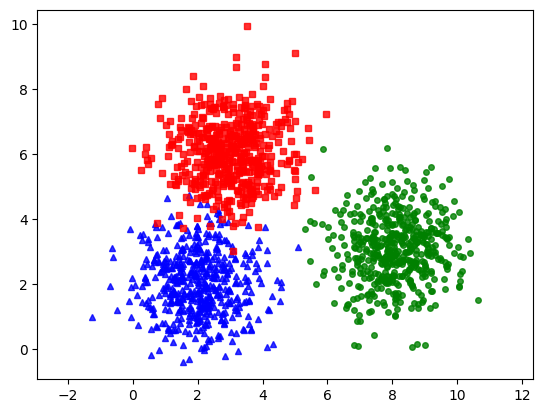

In [ ]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]

    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

kmeans_display(X, label)

In [ ]:
def init_centers(X, K):
    return X[np.random.choice(X.shape[0], K, replace=False)]

def assign_labels(X, centers): # remark label for each datapoint after update center
    D = cdist(X, centers)
    return np.argmin(D, axis=1) # find index of minimum value by row

def update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[-1])) # K x 2
    for k in range(K):
        Xk = X[labels==k,:] # all datapoint that label=K
        centers[k] = np.mean(Xk, axis=0) # mean by column

    return centers

def stopping(centers, new_centers):
    return set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers])

def kmeans(X, K):
    centers = init_centers(X, K)
    labels = []
    it = 0
    while True:
        labels = assign_labels(X, centers)
        new_centers = update_centers(X, labels, K)
        if stopping(centers, new_centers):
           break
        else:
          centers = new_centers
        it+=1

    return centers, labels, it

In [ ]:
K = int(mt.sqrt(X.shape[0]))
centers, labels, it = kmeans(X,K=3)
centers

array([[3.00188698, 6.00855841],
       [1.98379957, 1.99683971],
       [8.06633167, 3.06841999]])

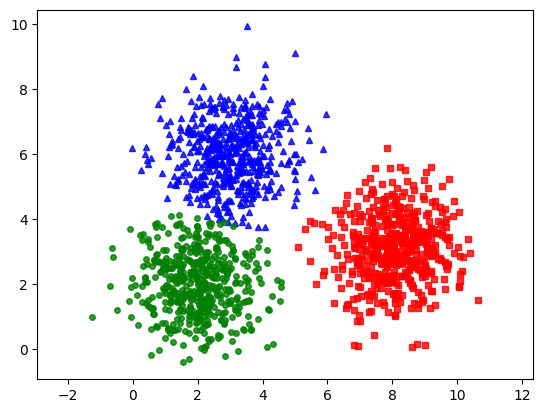

In [ ]:
kmeans_display(X, labels)

## KNN

In [ ]:
import numpy as np
import math as mt
from sklearn import datasets
from collections import Counter
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
iris = datasets.load_iris()
data = iris['data']
label = iris['target']

In [ ]:
print('Number of classes: ',len(np.unique(label)))
print(f'Number of data point: {len(data)}')

Number of classes:  3
Number of data point: 150


In [ ]:
X0 = data[label==0,:]
X1 = data[label==1,:]
X2 = data[label==2,:]

In [ ]:
len(X0), len(X1), len(X2)

(50, 50, 50)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    data,label, test_size=50
)

print('Training size: ',len(X_train))
print('Test size: ', len(X_test))

Training size:  100
Test size:  50


In [ ]:
def KNN(X_train, Y_train, X_test, K):
    distances = cdist(X_test, X_train)
    predict_labels = []

    for distance in distances:
        distance = [[dist, Y_train[id]] for id,dist in enumerate(distance)]
        distance = sorted(distance, key=lambda x: x[0])

        predicts = [x[-1] for x in distance[:K]]
        counter = Counter(predicts)
        predict_labels.append(counter.most_common()[0][0])

    return predict_labels

In [ ]:
y_pred = KNN(X_train, Y_train, X_test, K=int(mt.sqrt(len(X_train))))
accuracy_score(Y_test, y_pred)

0.98

## Perceptron Learning Algorithm

In [139]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [140]:
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N).T # 2x10
X1 = np.random.multivariate_normal(means[1], cov, N).T # 2x10

In [141]:
X = np.concatenate((X0,X1),axis=1) # 2x20
label = np.concatenate((np.ones((1,N)),-1*np.ones((1,N))),axis=1)
label

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1.]])

In [142]:
X = np.concatenate((np.ones((1,2*N)),X),axis=0) # 3x20
X.shape

(3, 20)

In [143]:
def sgn(w,x):
  return np.sign(np.dot(w.T,x))

def stopping(X,y,w):
  return np.array_equal(sgn(w,X),y)

def perceptron(X,y,w_init, eta=1e-6):
    w = [w_init] # 1x3x1
    N = X.shape[1] # 20
    d = X.shape[0] # 3
    iter = 0
    mis_points = []
    while True:
      mix_id = np.random.permutation(N) # 1x20
      for i in range(N):
          xi = X[:, mix_id[i]].reshape(d,1)
          yi = y[0, mix_id[i]]
          if sgn(w[-1], xi) != yi:
             mis_points.append(mix_id[i])
             w_new = w[-1] + eta*yi*xi
             w.append(w_new)
      if stopping(X,y,w[-1]):
         return w[-1], mis_points, iter
      iter += 1

In [144]:
w_init = np.random.randn(X.shape[0], 1)
w, mis_points, iter = perceptron(X, label, w_init)
w, iter

(array([[ 0.33691855],
        [-0.36870843],
        [ 0.42971171]]),
 555453)